# Enemy Survivability 

How long it takes for each weapon to kill an enemy.

## Setting Up

In [1]:
import pandas as pd

%run weapon_full_data.ipynb

## Weapon Damages by Alien

In [2]:
weapon_damages_aliens = weapon_data_aliens.groupby(["weapon", "alien"]).mean()
weapon_damages_aliens = weapon_damages_aliens[["penetrating_damage_expected"]]
weapon_damages_aliens = weapon_damages_aliens.rename(columns={"penetrating_damage_expected": "turn_damage"})
weapon_damages_aliens = weapon_damages_aliens.sort_values(by=["turn_damage"])

## Alien Damage Lists

### Averages

In [3]:
weapon_damages_average = weapon_damages_aliens.groupby(["weapon"]).mean()
weapon_damages_average = weapon_damages_average.sort_values(by=["turn_damage"])

In [4]:
weapon_damages_max = weapon_damages_aliens.groupby(["weapon"]).max()
weapon_damages_max = weapon_damages_max.sort_values(by=["turn_damage"])

In [5]:
average_damages_expected = weapon_damages_max.merge(weapon_damages_average, on="weapon")
average_damages_expected = average_damages_expected.rename(columns={"turn_damage_x": "max", "turn_damage_y": "average"})
average_damages_expected = average_damages_expected.sort_values(by=["average"])
average_damages_expected

,max,average
weapon,,
grenade,16.891875,11.073563
pistol,35.293500,14.830860
rifle,37.552014,17.087889
proximity_grenade,24.041875,17.866063
alien_grenade,31.191875,24.706229
auto_cannon,43.546759,24.995090
heavy_cannon,43.931250,27.979875
rocket_launcher,40.828333,30.347243
cannon_turret,47.231250,30.861875


Text(0, 0.5, 'Damage')

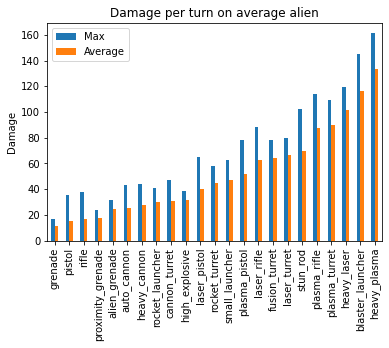

In [6]:
ax = average_damages_expected.plot.bar(title="Damage per turn on average alien", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

### Damage Per Time Unit

In [7]:
weapon_damages_per_tu_targets_average = weapon_data_aliens[["weapon", "penetrating_damage_per_time_unit"]]
weapon_damages_per_tu_targets_average = weapon_damages_per_tu_targets_average.groupby(["weapon"]).mean()
weapon_damages_per_tu_targets_average = weapon_damages_per_tu_targets_average.rename(columns={"penetrating_damage_per_time_unit": "damage_per_time_unit"})
weapon_damages_per_tu_targets_average = weapon_damages_per_tu_targets_average.sort_values(by=["damage_per_time_unit"])

In [8]:
weapon_damages_per_tu_targets_max = weapon_data_aliens[["weapon", "penetrating_damage_per_time_unit"]]
weapon_damages_per_tu_targets_max = weapon_damages_per_tu_targets_max.groupby(["weapon"]).max()
weapon_damages_per_tu_targets_max = weapon_damages_per_tu_targets_max.rename(columns={"penetrating_damage_per_time_unit": "damage_per_time_unit"})
weapon_damages_per_tu_targets_max = weapon_damages_per_tu_targets_max.sort_values(by=["damage_per_time_unit"])

In [9]:
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_max.merge(weapon_damages_per_tu_targets_average, on="weapon")
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_expected.rename(columns={"damage_per_time_unit_x": "max", "damage_per_time_unit_y": "average"})
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_expected.sort_values(by=["average"])
weapon_damages_per_tu_targets_expected

,max,average
weapon,,
rifle,0.583929,0.265714
pistol,0.968750,0.407083
grenade,0.630000,0.413000
auto_cannon,0.821895,0.471754
heavy_cannon,0.942478,0.600265
cannon_turret,1.013274,0.662094
proximity_grenade,0.896667,0.666333
laser_pistol,1.297500,0.810450
plasma_pistol,1.231250,0.818875


Text(0, 0.5, 'Ratio')

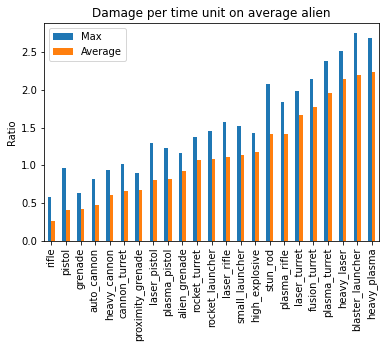

In [10]:
ax = weapon_damages_per_tu_targets_expected.plot.bar(title="Damage per time unit on average alien", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Ratio")

### Hits to Kill

In [11]:
hits_to_kill_average = weapon_data_aliens[["weapon", "hits_to_kill"]]
hits_to_kill_average = hits_to_kill_average[hits_to_kill_average["hits_to_kill"] < 200]
hits_to_kill_average = hits_to_kill_average.groupby(["weapon"]).mean()
hits_to_kill_average = hits_to_kill_average.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

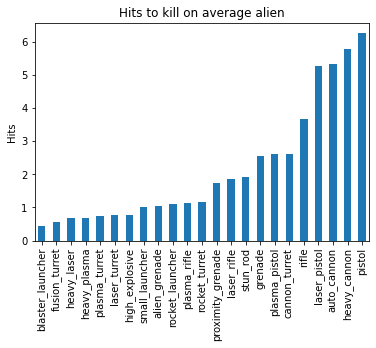

In [12]:
ax = hits_to_kill_average.plot.bar(title="Hits to kill on average alien", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Expected Kills in a Turn

In [13]:
expected_kills = weapon_data_aliens[["weapon", "expected_kills"]]
expected_kills = expected_kills.groupby(["weapon"]).mean()
expected_kills = expected_kills.sort_values(by=["expected_kills"])

Text(0, 0.5, 'Kills')

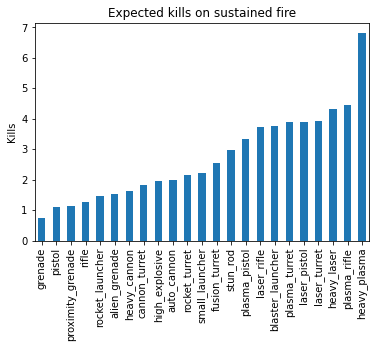

In [14]:
ax = expected_kills.plot.bar(title="Expected kills on sustained fire", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Kills")

## Alien Damages

### Sectoid

In [15]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Sectoid")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

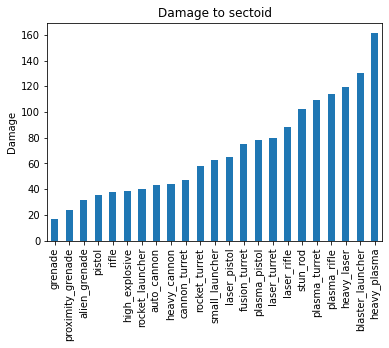

In [16]:
ax = weapon_damages_graph.plot.bar(title="Damage to sectoid", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [17]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Sectoid")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

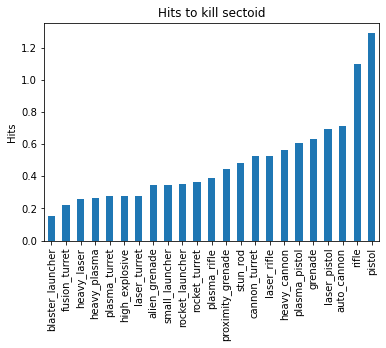

In [18]:
ax = hits_to_kill_graph.plot.bar(title="Hits to kill sectoid", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Snakeman

In [19]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Snakeman")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

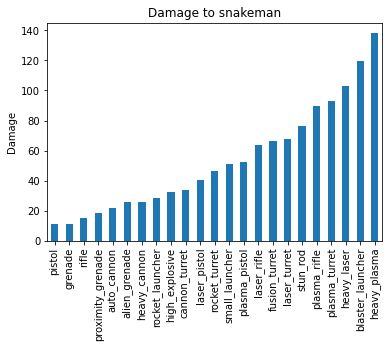

In [20]:
ax = weapon_damages_graph.plot.bar(title="Damage to snakeman", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [21]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Snakeman")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

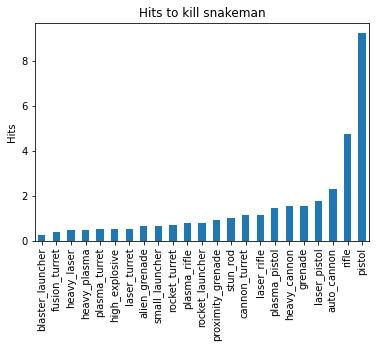

In [22]:
ax = hits_to_kill_graph.plot.bar(title="Hits to kill snakeman", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Floater

In [23]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Floater")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

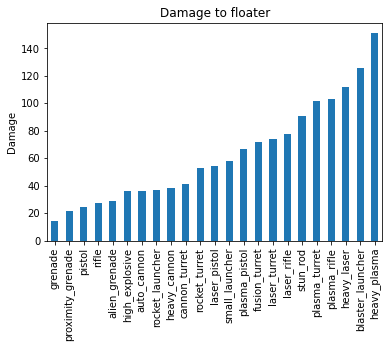

In [24]:
ax = weapon_damages_graph.plot.bar(title="Damage to floater", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [25]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Floater")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

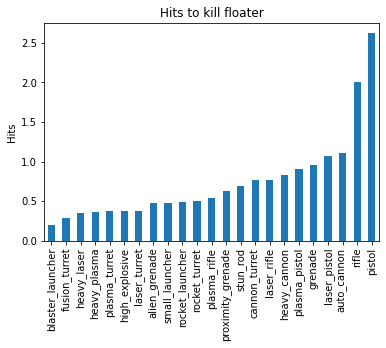

In [26]:
ax = hits_to_kill_graph.plot.bar(title="Hits to kill floater", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Muton

In [27]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Muton")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

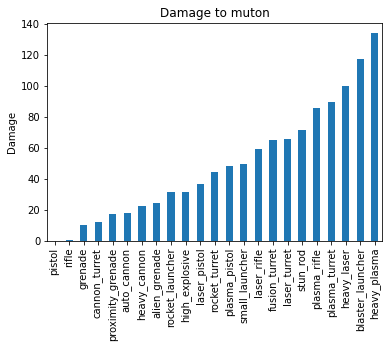

In [28]:
ax = weapon_damages_graph.plot.bar(title="Damage to muton", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [29]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Muton")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

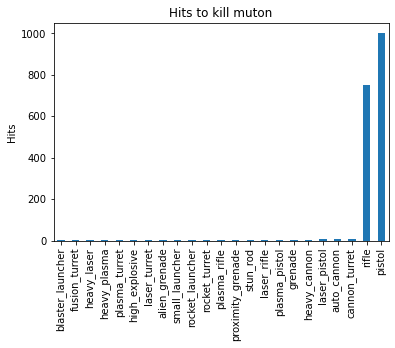

In [30]:
ax = hits_to_kill_graph.plot.bar(title="Hits to kill muton", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

Text(0, 0.5, 'Hits')

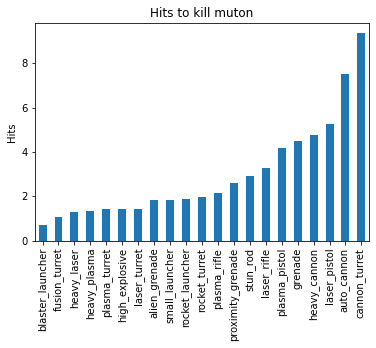

In [31]:
ax = hits_to_kill_graph[hits_to_kill_graph["hits_to_kill"] < 200].plot.bar(title="Hits to kill muton", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Ethereal

In [32]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Ethereal")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

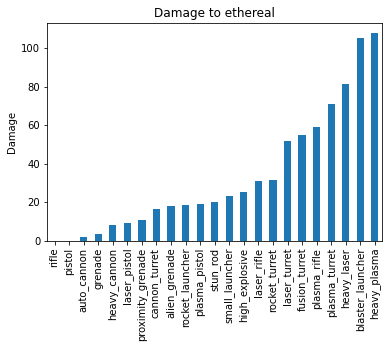

In [33]:
ax = weapon_damages_graph.plot.bar(title="Damage to ethereal", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [34]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Ethereal")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

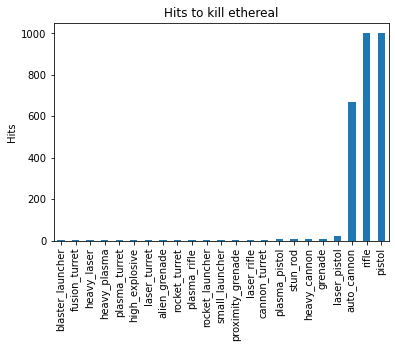

In [35]:
ax = hits_to_kill_graph.plot.bar(title="Hits to kill ethereal", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

Text(0, 0.5, 'Hits')

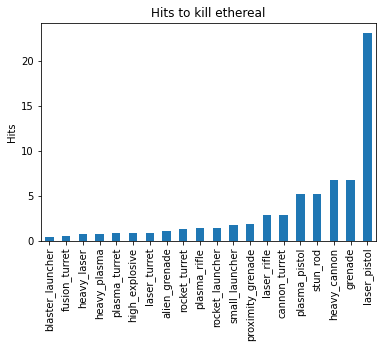

In [36]:
ax = hits_to_kill_graph[hits_to_kill_graph["hits_to_kill"] < 200].plot.bar(title="Hits to kill ethereal", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Reaper

In [37]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Reaper")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

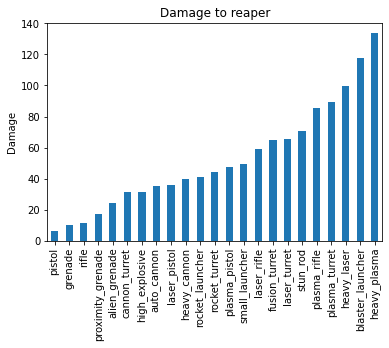

In [38]:
ax = weapon_damages_graph.plot.bar(title="Damage to reaper", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [39]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Reaper")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

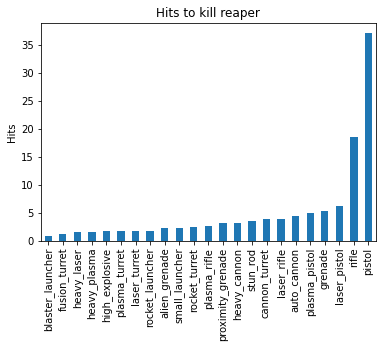

In [40]:
ax = hits_to_kill_graph.plot.bar(title="Hits to kill reaper", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

Text(0, 0.5, 'Hits')

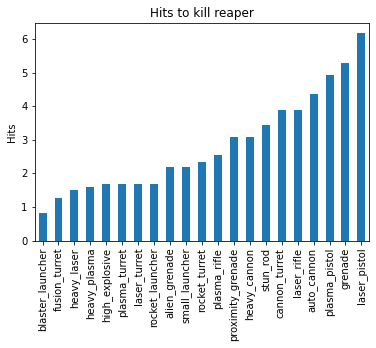

In [41]:
ax = hits_to_kill_graph[hits_to_kill_graph["hits_to_kill"] < 15].plot.bar(title="Hits to kill reaper", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Chryssalid

In [42]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Chryssalid")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

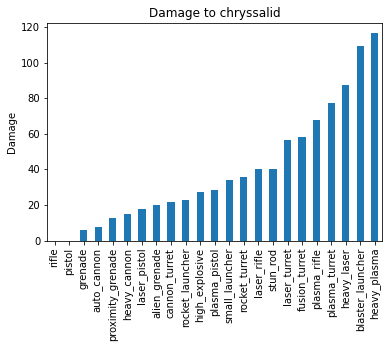

In [43]:
ax = weapon_damages_graph.plot.bar(title="Damage to chryssalid", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [44]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Chryssalid")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

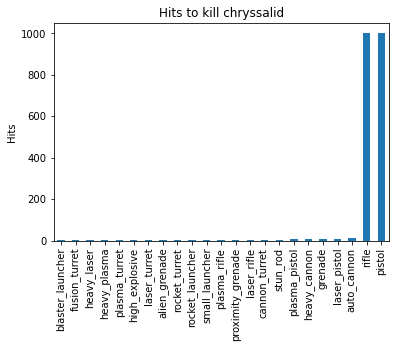

In [45]:
ax = hits_to_kill_graph.plot.bar(title="Hits to kill chryssalid", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

Text(0, 0.5, 'Hits')

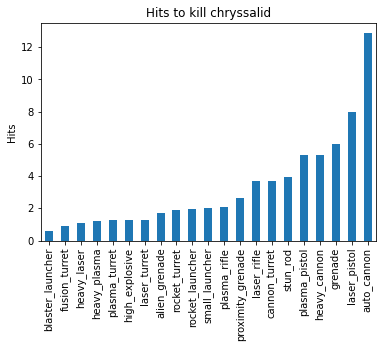

In [46]:
ax = hits_to_kill_graph[hits_to_kill_graph["hits_to_kill"] < 200].plot.bar(title="Hits to kill chryssalid", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Zombie

In [47]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Zombie")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

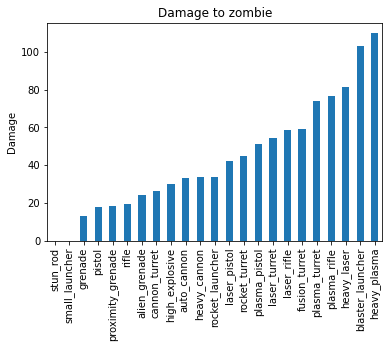

In [48]:
ax = weapon_damages_graph.plot.bar(title="Damage to zombie", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [49]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Zombie")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

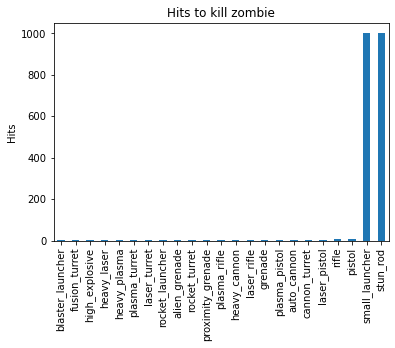

In [50]:
ax = hits_to_kill_graph.plot.bar(title="Hits to kill zombie", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

Text(0, 0.5, 'Hits')

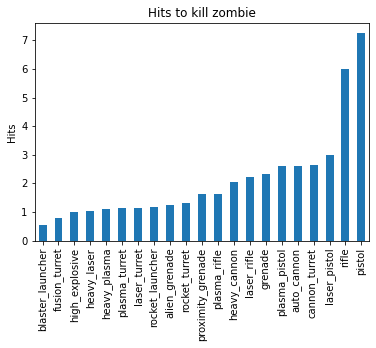

In [51]:
ax = hits_to_kill_graph[hits_to_kill_graph["hits_to_kill"] < 200].plot.bar(title="Hits to kill zombie", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Cyberdisk

In [52]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Cyberdisc")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

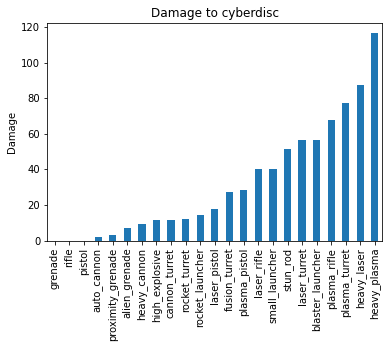

In [53]:
ax = weapon_damages_graph.plot.bar(title="Damage to cyberdisc", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [54]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Cyberdisc")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

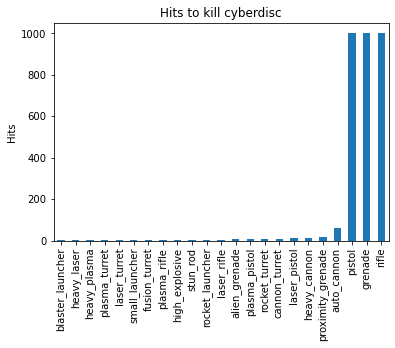

In [55]:
ax = hits_to_kill_graph.plot.bar(title="Hits to kill cyberdisc", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

Text(0, 0.5, 'Hits')

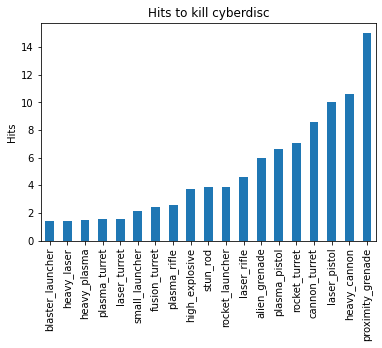

In [56]:
ax = hits_to_kill_graph[hits_to_kill_graph["hits_to_kill"] < 60].plot.bar(title="Hits to kill cyberdisc", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Sectopod

In [57]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Sectopod")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

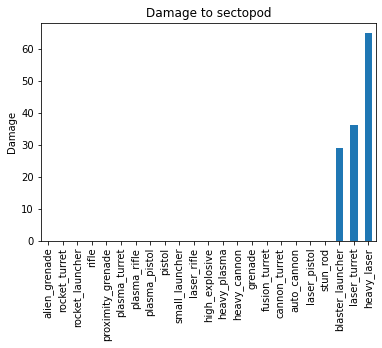

In [58]:
ax = weapon_damages_graph.plot.bar(title="Damage to sectopod", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [59]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Sectopod")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

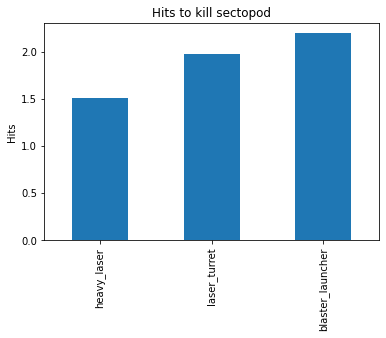

In [60]:
ax = hits_to_kill_graph[hits_to_kill_graph["hits_to_kill"] < 200].plot.bar(title="Hits to kill sectopod", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

In [61]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Sectopod")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_crit_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_crit_expected": "damage"})
weapon_damages_graph = weapon_damages_graph * 2
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

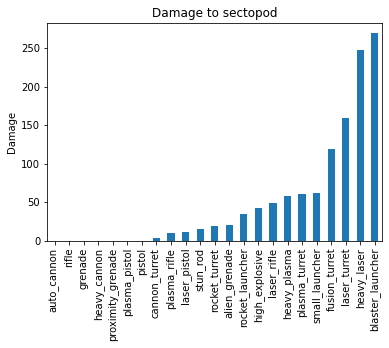

In [62]:
ax = weapon_damages_graph.plot.bar(title="Damage to sectopod", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [63]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Sectopod")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill_crit"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill_crit"])

Text(0, 0.5, 'Hits')

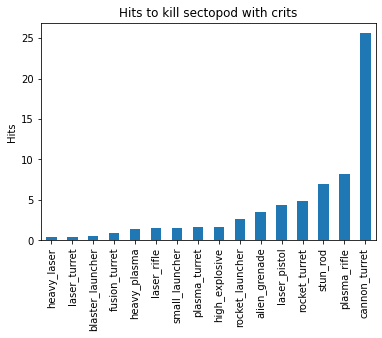

In [64]:
ax = hits_to_kill_graph[hits_to_kill_graph["hits_to_kill_crit"] < 200].plot.bar(title="Hits to kill sectopod with crits", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Silacoid

In [65]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Silacoid")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

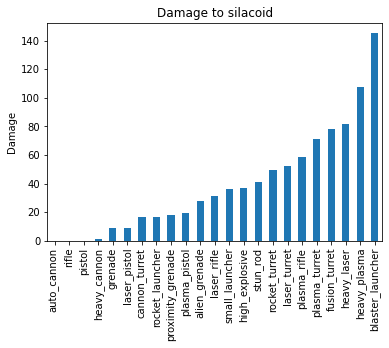

In [66]:
ax = weapon_damages_graph.plot.bar(title="Damage to silacoid", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [67]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Silacoid")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

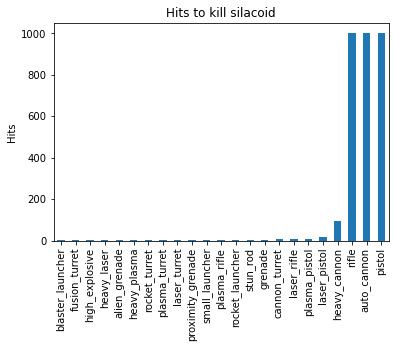

In [68]:
ax = hits_to_kill_graph.plot.bar(title="Hits to kill silacoid", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

Text(0, 0.5, 'Hits')

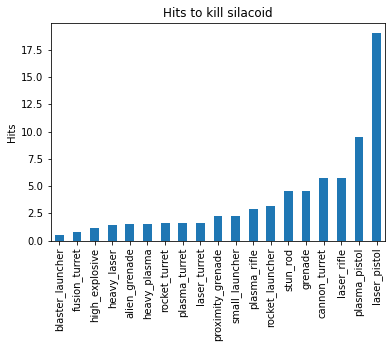

In [69]:
ax = hits_to_kill_graph[hits_to_kill_graph["hits_to_kill"] < 80].plot.bar(title="Hits to kill silacoid", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Celatid

In [70]:
weapon_damages_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Celatid")]
weapon_damages_graph = weapon_damages_graph.groupby(["weapon"]).mean()
weapon_damages_graph = weapon_damages_graph[["penetrating_damage_expected"]]
weapon_damages_graph = weapon_damages_graph.rename(columns={"penetrating_damage_expected": "damage"})
weapon_damages_graph = weapon_damages_graph.sort_values(by=["damage"])

Text(0, 0.5, 'Damage')

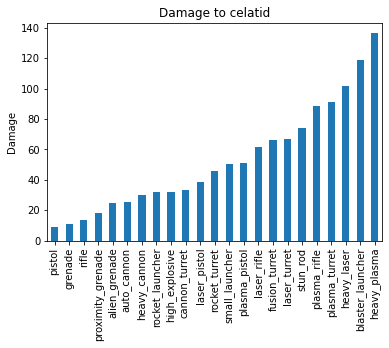

In [71]:
ax = weapon_damages_graph.plot.bar(title="Damage to celatid", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

In [72]:
hits_to_kill_graph = weapon_data_aliens[weapon_data_aliens["alien"].str.contains("Celatid")]
hits_to_kill_graph = hits_to_kill_graph.groupby(["weapon"]).mean()
hits_to_kill_graph = hits_to_kill_graph[["hits_to_kill"]]
hits_to_kill_graph = hits_to_kill_graph.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

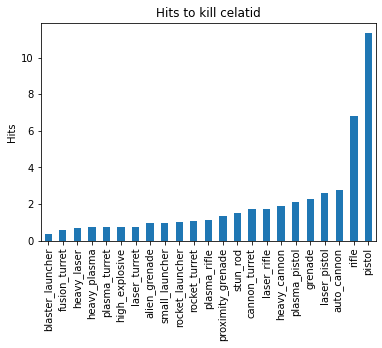

In [73]:
ax = hits_to_kill_graph.plot.bar(title="Hits to kill celatid", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")